# Métodos de Euler, Euler implícito y Heun
#### https://meet.noysi.com/metodosnumericos2

En esta práctica implementaremos y compararemos estos tres métodos. 

Vamos a considerar el siguiente problema de valor inicial:

Aproximar el valor en $t=1$ de la solución del PVI $$x'=t(x^2-x),\quad x(-1)=0,5.$$ 

In [1]:
f(t,x) = t*(x^2-x)

In [2]:
u(t) = exp(1/2)/(exp(1/2) + e^(t^2/2))

In [3]:
ss = u.diff()(t)-f(t,u(t))
ss.simplify_full()

0

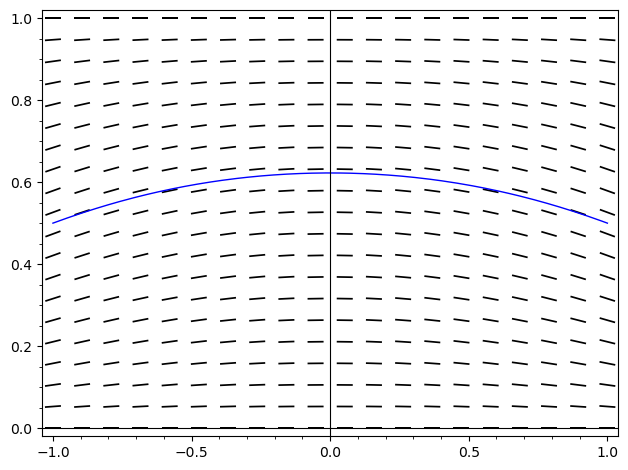

In [6]:
gs = plot_slope_field(f(t,x),(t,-1,1),(x,0,1)) + plot(u(t),(t,-1,1))
gs

1. Implementar el método de Euler y aplicarlo al PVI ejemplo 1 con $5$ pasos. 

a) Representa los resultados junto con la solución exacta y el campo de pendientes. 

b) Aplica también el método con $10$, $20$ y $50$ pasos y representa en una gráfica las aproximaciones obtenidas y la solución exacta.

In [8]:
# Datos del problema (1 paso)
f(t,x) = t*(x^2-x)
a = -1
b = 1
x0 = 0.5
n = 1 

In [9]:
h = (b-a)/n
t0 = a

In [10]:
t1 = t0 + h
x1 = x0 + h*f(t0,x0)

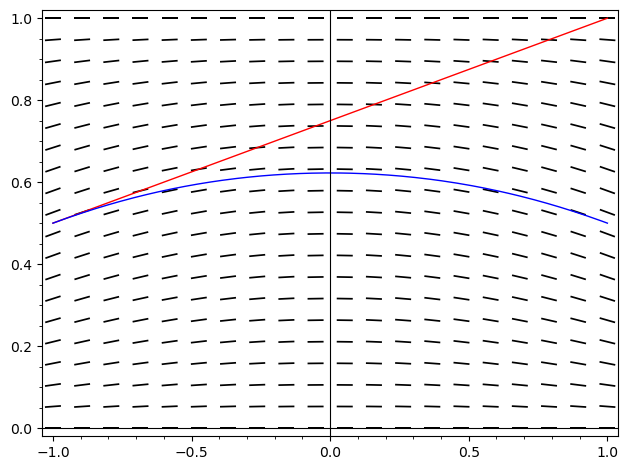

In [12]:
line([(t0,x0),(t1,x1)],color='red') + gs

In [50]:
# Datos del problema (5 pasos)
f(t,x) = t*(x^2-x)
a = -1
b = 1
x0 = 0.5
n = 5

In [51]:
h = (b-a)/n
ti = [a.n(), a+h .. b]
xi = [x0]*(n+1)
for i in [ 1..5 ]:
    xi[i] = xi[i-1] + h * f( ti[i-1] , xi[i-1] ) 
e5 = list(zip(ti,xi))

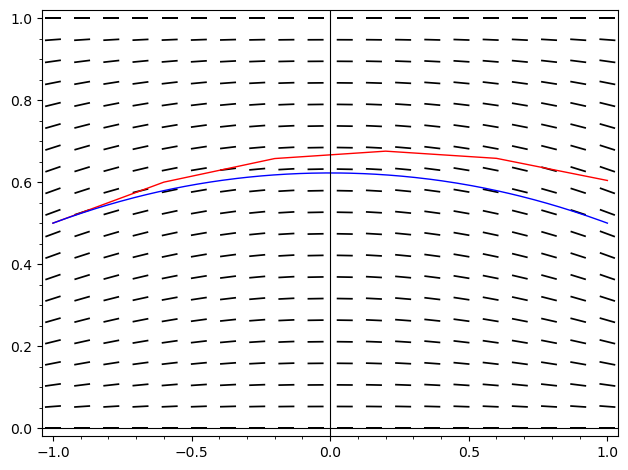

In [52]:
line(e5,color='red') + gs

In [53]:
def euler(f,a,b,x0,n):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    for i in [ 1..n ]:
        xi[i] = xi[i-1] + h * f( ti[i-1] , xi[i-1] ) 
    return list(zip(ti,xi))

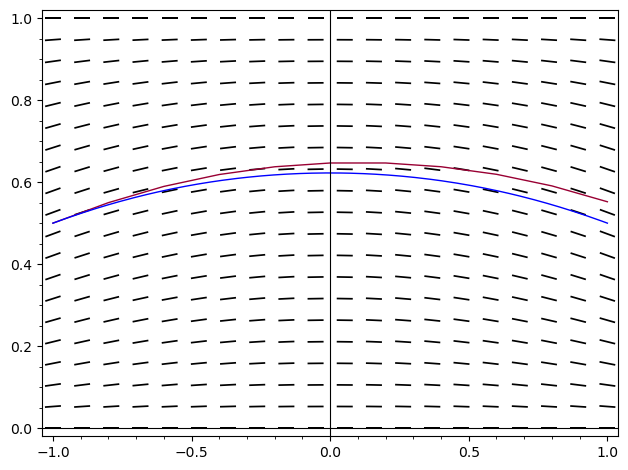

In [54]:
line(euler(f,a,b,x0,10),color=[0.6,0,0.2]) + gs

In [69]:
# Datos del problema (5 pasos)
f(t,x) = t*(x^2-x)
a = -1
b = 2
x0 = 0.5

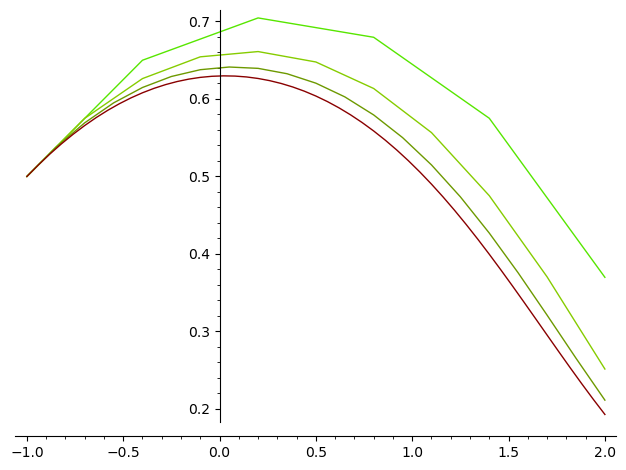

In [71]:
sum([line(euler(f,a,b,x0,n),color=[random(),1-n/50,0]) for n in [5,10,20,50]]) 

2. Implementar el método de Euler implícito y el método de Heun y aplicarlo al PVI ejemplo con $5$, $10$, $20$ y $50$ pasos. Representar en una gráfica las aproximaciones obtenidas y la solución exacta. Para implementar el método de Euler implícito, crea antes una función que aplique el método del punto fijo. 

In [100]:
def heun(f,a,b,x0,n):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    for i in [ 1..n ]:
        xi[i] = xi[i-1] + h*f(ti[i-1],xi[i-1]) 
        xi[i] = xi[i-1] + h * ( f( ti[i-1] , xi[i-1] ) +
                                f( ti[i]   ,  xi[i]  ) )/2
    return list(zip(ti,xi))

In [101]:
# Datos del problema (5 pasos)
f(t,x) = t*(x^2-x)
a = -1
b = 1
x0 = 0.5
n = 4

In [102]:
heun(f,a,b,x0,n)

[(-1.00000000000000, 0.500000000000000),
 (-0.500000000000000, 0.591796875000000),
 (0.000000000000000, 0.621993541717529),
 (0.500000000000000, 0.592603844745128),
 (1.00000000000000, 0.500185757497396)]

In [103]:
F(x) = exp(-x)

In [104]:
def punto_fijo(F,y0,n):
    for _ in range(n):
        y0 = F(y0)
    return y0

In [105]:
punto_fijo(F,1.,10)

0.568428725029061

In [106]:
def euler_implicito(f,a,b,x0,n):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    for i in [ 1..n ]:
        # x = xi[i-1] + h * f( ti[i] , x ) = F(x)
        F(x) = xi[i-1] + h * f( ti[i] , x ) 
        xi[i] = punto_fijo( F , xi[i-1] , 3)
        #xi[i] = xi[i-1] + h * f( ti[i] , xi[i] )
    return list(zip(ti,xi))

In [107]:
euler_implicito(f,a,b,x0,n)

[(-1.00000000000000, 0.500000000000000),
 (-0.500000000000000, 0.561553716659546),
 (0.000000000000000, 0.561553716659546),
 (0.500000000000000, 0.499053940522586),
 (1.00000000000000, 0.381017700118895)]

In [108]:
def euler_implicito(f,a,b,x0,n):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    for i in [ 1..n ]:
        # x = xi[i-1] + h * f( ti[i] , x ) = F(x)
        xi[i] = xi[i-1]
        xi[i] = xi[i-1] + h * f( ti[i] , xi[i] )
        xi[i] = xi[i-1] + h * f( ti[i] , xi[i] )
        xi[i] = xi[i-1] + h * f( ti[i] , xi[i] )
    return list(zip(ti,xi))

In [109]:
euler_implicito(f,a,b,x0,n)

[(-1.00000000000000, 0.500000000000000),
 (-0.500000000000000, 0.561553716659546),
 (0.000000000000000, 0.561553716659546),
 (0.500000000000000, 0.499053940522586),
 (1.00000000000000, 0.381017700118895)]

3. Consideremos el PVI $x'=x$, $x(0)=1$. Queremos aproximar $x(1)$.

a) Aplica los métodos anteriores y representa, en una gráfica para cada método, los errores cometidos al aproximar con cada número de pasos entre 10 y 100 pasos. En el eje $x$ representa $h$ y en el $y$ el error obtenido a partir de la diferencia (en valor absoluto) con la solución exacta. Representa los errores en escala normal y en escala logarítmica en el eje y. 

b) Representa en otra gráfica los errores locales de truncamiento. 